In [47]:
import numpy as np
import pandas as pd
import hashlib

# import submodule pyplot from matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
import copy

# download the data from - https://www.kaggle.com/austinreese/craigslist-carstrucks-data
raw_data=pd.read_csv("vehicles.csv")

## Preprocessing

### 1. Drop irrelevant columns and rows

In [48]:
raw_data = raw_data.drop(['url', 'region', 'region_url', 'vin', 'image_url', 'description', 'county', 'lat', 'long','model'], axis=1)  

### 2. Consider the data for California State only.

In [49]:
raw_data = raw_data.loc[raw_data['state'] == 'ca']

### 3. Populate NA values with most used values

In [50]:
data_no_mv = raw_data.copy()

In [51]:
data_no_mv.isnull().sum()

id                  0
price               0
year              149
manufacturer     2796
condition       22202
cylinders       24123
fuel              234
odometer         9186
title_status      300
transmission      758
drive           16918
size            37921
type            12331
paint_color     17334
state               0
dtype: int64

In [52]:
# Fill na with median odometer value.
data_no_mv[['odometer']] = data_no_mv[['odometer']].fillna(value=93300)
# Fill na with most used drive value.
data_no_mv[['drive']] = data_no_mv[['drive']].fillna(value='4wd')
# Fill na with most used condition value ie. good
data_no_mv[['condition']] = data_no_mv[['condition']].fillna(value='good')
# Fill na with most used cylinders value.
data_no_mv[['cylinders']] = data_no_mv[['cylinders']].fillna(value='6 cylinders')
# Fill na with most used fuel value gas.
data_no_mv[['fuel']] = data_no_mv[['fuel']].fillna(value='gas')
# Fill na with most used title_status value.
data_no_mv[['title_status']] = data_no_mv[['title_status']].fillna(value='clean')
# Fill na with unkown manufacturer value.
data_no_mv[['manufacturer']] = data_no_mv[['manufacturer']].fillna(value='unknown')
# Fill na with most used transmission value.
data_no_mv[['transmission']] = data_no_mv[['transmission']].fillna(value='automatic')
# Fill na with most used size value.
data_no_mv[['size']] = data_no_mv[['size']].fillna(value='full-size')
# Fill na with most used type value.
data_no_mv[['type']] = data_no_mv[['size']].fillna(value='SUV')
# Fill na with most used paint_color value.
data_no_mv[['paint_color']] = data_no_mv[['paint_color']].fillna(value='white')

In [53]:
data_no_mv.isnull().sum()

id                0
price             0
year            149
manufacturer      0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
size              0
type              0
paint_color       0
state             0
dtype: int64

### 4. Drop rows where price is not known

In [54]:
data_no_mv = data_no_mv.dropna(subset=['year']) 

In [55]:
data_no_mv.isnull().sum()

id              0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [56]:
data_no_mv.shape

(55029, 15)

## Dealing with outliers

In [57]:
data_no_outlier = data_no_mv.copy()

### 1. Drop rows with price = 0

In [58]:
data_no_outlier = data_no_outlier.loc[data_no_outlier['price'] > 0]

### 2. Fix datatype for year

In [59]:
data_no_outlier["year"] = data_no_outlier['year'].astype('int')

In [60]:
data_no_outlier.describe(include='all')

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,4.961800e+04,4.961800e+04,49618.000000,49618,49618,49618,49618,4.961800e+04,49618,49618,49618,49618,49618,49618,49618
unique,NaN,NaN,NaN,42,6,8,5,NaN,6,3,3,4,4,12,1
top,NaN,NaN,NaN,ford,good,6 cylinders,gas,NaN,clean,automatic,4wd,full-size,full-size,white,ca
freq,NaN,NaN,NaN,7951,29232,30756,43256,NaN,47636,43219,26957,42464,42464,26209,49618
mean,7.088802e+09,8.188417e+05,2008.990991,NaN,NaN,NaN,NaN,9.695163e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.991169e+06,4.916940e+07,9.999132,NaN,NaN,NaN,NaN,1.068375e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.074419e+09,1.000000e+00,1900.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.086486e+09,6.000000e+03,2006.000000,NaN,NaN,NaN,NaN,5.362500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.090879e+09,1.199500e+04,2011.000000,NaN,NaN,NaN,NaN,9.330000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.092873e+09,1.920000e+04,2015.000000,NaN,NaN,NaN,NaN,1.224272e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. remove outliers for price

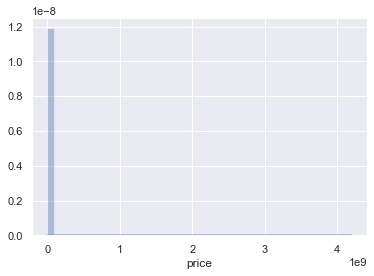

In [61]:
sns.distplot(data_no_outlier['price'])

In [62]:
# by looking at the max price, it definitely seems there are some outliers
# using http://www.easysurf.cc/scintd.htm - the value is 4,198,287,000
# since this data set is for used cars, that car price seems ridiculous
# OTOH, 75th percentile value seems reasonable - 19,750

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_outlier['price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_no_outlier = data_no_outlier[data_no_outlier['price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_no_outlier.describe(include='all')

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,4.912000e+04,49120.000000,49120.000000,49120,49120,49120,49120,4.912000e+04,49120,49120,49120,49120,49120,49120,49120
unique,NaN,NaN,NaN,42,6,8,5,NaN,6,3,3,4,4,12,1
top,NaN,NaN,NaN,ford,good,6 cylinders,gas,NaN,clean,automatic,4wd,full-size,full-size,white,ca
freq,NaN,NaN,NaN,7882,28990,30409,42898,NaN,47143,42782,26578,42016,42016,25906,49120
mean,7.088795e+09,13996.646152,2008.976181,NaN,NaN,NaN,NaN,9.748880e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.993845e+06,10192.767618,9.931423,NaN,NaN,NaN,NaN,1.069819e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.074419e+09,1.000000,1900.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.086483e+09,6000.000000,2006.000000,NaN,NaN,NaN,NaN,5.498225e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.090874e+09,11990.000000,2011.000000,NaN,NaN,NaN,NaN,9.330000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.092872e+09,18995.000000,2015.000000,NaN,NaN,NaN,NaN,1.227065e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# we still see one issue with the min price - it's $1 - that cannot be possible, so we have an outlier
# on the left side of price as well
q = data_no_outlier['price'].quantile(0.01)
data_no_outlier = data_no_outlier[data_no_outlier['price']>q]

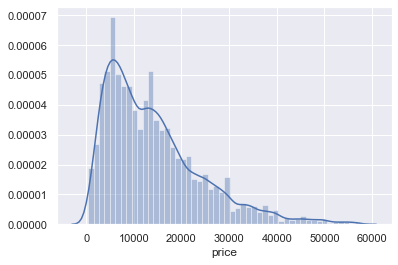

In [64]:
sns.distplot(data_no_outlier['price'])

### 4. remove outliers for mileage

In [65]:
q = data_no_outlier['odometer'].quantile(0.99)
data_no_outlier = data_no_outlier[data_no_outlier['odometer']<q]

In [66]:
q = data_no_outlier['odometer'].quantile(0.01)
data_no_outlier = data_no_outlier[data_no_outlier['odometer']>q]
data_no_outlier.describe(include='all')

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,4.757800e+04,47578.000000,47578.000000,47578,47578,47578,47578,47578.000000,47578,47578,47578,47578,47578,47578,47578
unique,NaN,NaN,NaN,42,6,8,5,NaN,6,3,3,4,4,12,1
top,NaN,NaN,NaN,ford,good,6 cylinders,gas,NaN,clean,automatic,4wd,full-size,full-size,white,ca
freq,NaN,NaN,NaN,7670,28170,29544,41666,NaN,45742,41503,25706,40662,40662,24996,47578
mean,7.088782e+09,14213.724936,2009.093531,NaN,NaN,NaN,NaN,94134.872441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.996245e+06,10111.778263,9.750695,NaN,NaN,NaN,NaN,51571.336469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.074419e+09,402.000000,1900.000000,NaN,NaN,NaN,NaN,109.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.086451e+09,6499.000000,2006.000000,NaN,NaN,NaN,NaN,55903.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.090843e+09,11998.000000,2011.000000,NaN,NaN,NaN,NaN,93300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.092869e+09,18999.000000,2015.000000,NaN,NaN,NaN,NaN,122196.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


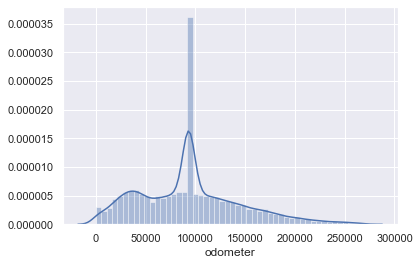

In [67]:
sns.distplot(data_no_outlier['odometer'])

### 5. remove any car that has Year in the future and/or is too old - example - 1900

In [68]:
data_no_outlier = data_no_outlier[data_no_outlier['year'] <= 2020]
data_no_outlier.describe(include='all')

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,4.757600e+04,47576.000000,47576.000000,47576,47576,47576,47576,47576.000000,47576,47576,47576,47576,47576,47576,47576
unique,NaN,NaN,NaN,42,6,8,5,NaN,6,3,3,4,4,12,1
top,NaN,NaN,NaN,ford,good,6 cylinders,gas,NaN,clean,automatic,4wd,full-size,full-size,white,ca
freq,NaN,NaN,NaN,7670,28169,29543,41664,NaN,45740,41502,25704,40661,40661,24994,47576
mean,7.088782e+09,14214.040798,2009.093030,NaN,NaN,NaN,NaN,94134.703653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.996148e+06,10111.817238,9.750595,NaN,NaN,NaN,NaN,51572.404300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.074419e+09,402.000000,1900.000000,NaN,NaN,NaN,NaN,109.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.086453e+09,6499.000000,2006.000000,NaN,NaN,NaN,NaN,55902.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.090843e+09,11998.000000,2011.000000,NaN,NaN,NaN,NaN,93300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.092869e+09,18999.000000,2015.000000,NaN,NaN,NaN,NaN,122202.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# the outliers seem to be on the left hand side, so we can remove the first 1% values
q = data_no_outlier['year'].quantile(0.02)
data_no_outlier = data_no_outlier[data_no_outlier['year']>q]

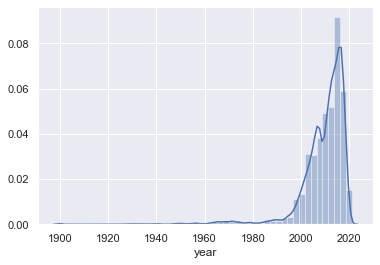

In [70]:
sns.distplot(data_no_mv['year'])

In [71]:
# lets remove any vehicle that's priced less than $2000 ( we will see how to deal with that later)
data_no_outlier = data_no_outlier[data_no_outlier['price'] > 2000]

In [72]:
data_no_outlier.describe(include='all')

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,4.508100e+04,45081.000000,45081.000000,45081,45081,45081,45081,45081.000000,45081,45081,45081,45081,45081,45081,45081
unique,NaN,NaN,NaN,41,6,8,5,NaN,6,3,3,4,4,12,1
top,NaN,NaN,NaN,ford,good,6 cylinders,gas,NaN,clean,automatic,4wd,full-size,full-size,white,ca
freq,NaN,NaN,NaN,7226,26677,28169,39280,NaN,43514,39634,24308,38673,38673,23565,45081
mean,7.088782e+09,14634.049955,2010.356980,NaN,NaN,NaN,NaN,93275.890841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.996512e+06,9931.379378,6.580968,NaN,NaN,NaN,NaN,51395.481796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.074419e+09,2100.000000,1975.000000,NaN,NaN,NaN,NaN,109.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.086489e+09,6995.000000,2007.000000,NaN,NaN,NaN,NaN,53808.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.090836e+09,12500.000000,2012.000000,NaN,NaN,NaN,NaN,93300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.092868e+09,19600.000000,2015.000000,NaN,NaN,NaN,NaN,122222.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaned

In [73]:
data_cleaned = data_no_outlier.copy()

In [74]:
data_cleaned.describe(include='all')

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,4.508100e+04,45081.000000,45081.000000,45081,45081,45081,45081,45081.000000,45081,45081,45081,45081,45081,45081,45081
unique,NaN,NaN,NaN,41,6,8,5,NaN,6,3,3,4,4,12,1
top,NaN,NaN,NaN,ford,good,6 cylinders,gas,NaN,clean,automatic,4wd,full-size,full-size,white,ca
freq,NaN,NaN,NaN,7226,26677,28169,39280,NaN,43514,39634,24308,38673,38673,23565,45081
mean,7.088782e+09,14634.049955,2010.356980,NaN,NaN,NaN,NaN,93275.890841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.996512e+06,9931.379378,6.580968,NaN,NaN,NaN,NaN,51395.481796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.074419e+09,2100.000000,1975.000000,NaN,NaN,NaN,NaN,109.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.086489e+09,6995.000000,2007.000000,NaN,NaN,NaN,NaN,53808.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.090836e+09,12500.000000,2012.000000,NaN,NaN,NaN,NaN,93300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.092868e+09,19600.000000,2015.000000,NaN,NaN,NaN,NaN,122222.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
data_cleaned.shape

(45081, 15)

In [76]:
data_cleaned = data_cleaned.drop(['id'],axis=1)

### we will keep only vehicles with clean and lien title

In [77]:
data1 = data_cleaned.loc[data_cleaned['title_status'] == 'clean']
data2 = data_cleaned.loc[data_cleaned['title_status'] == 'lien']
frames = [data1, data2]
data_more_cleaned = result = pd.concat(frames)
data_more_cleaned.shape

(43635, 14)

### Scatter plots wrt price

Text(0.5, 1.0, 'Price and Mileage')

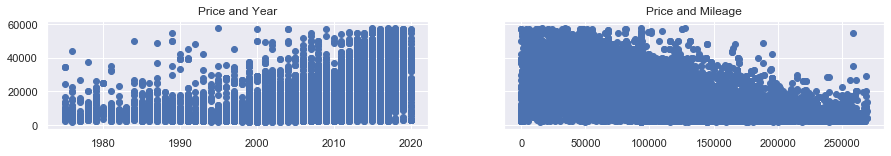

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,2)) #sharey -> share 'Price' as y
ax1.scatter(data_more_cleaned['year'],data_more_cleaned['price'])
ax1.set_title('Price and Year')
ax2.scatter(data_more_cleaned['odometer'],data_more_cleaned['price'])
ax2.set_title('Price and Mileage')

In [79]:
log_price = np.log(data_more_cleaned['price'])
data_more_cleaned['log_price'] = log_price

Text(0.5, 1.0, 'Log Price and Mileage')

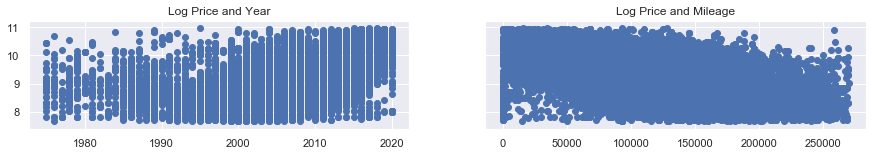

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,2)) #sharey -> share 'Price' as y
ax1.scatter(data_more_cleaned['year'],data_more_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_more_cleaned['odometer'],data_more_cleaned['log_price'])
ax2.set_title('Log Price and Mileage')

### More Visualization

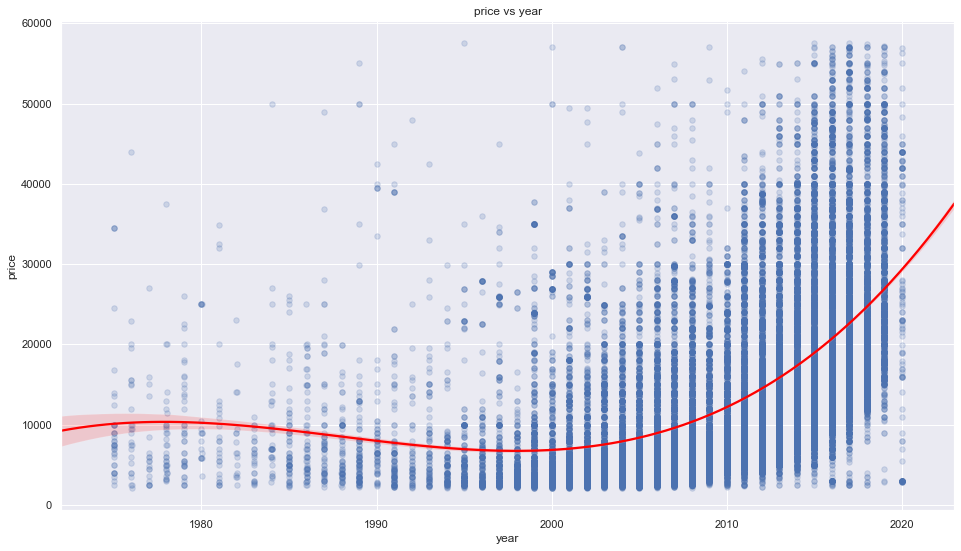

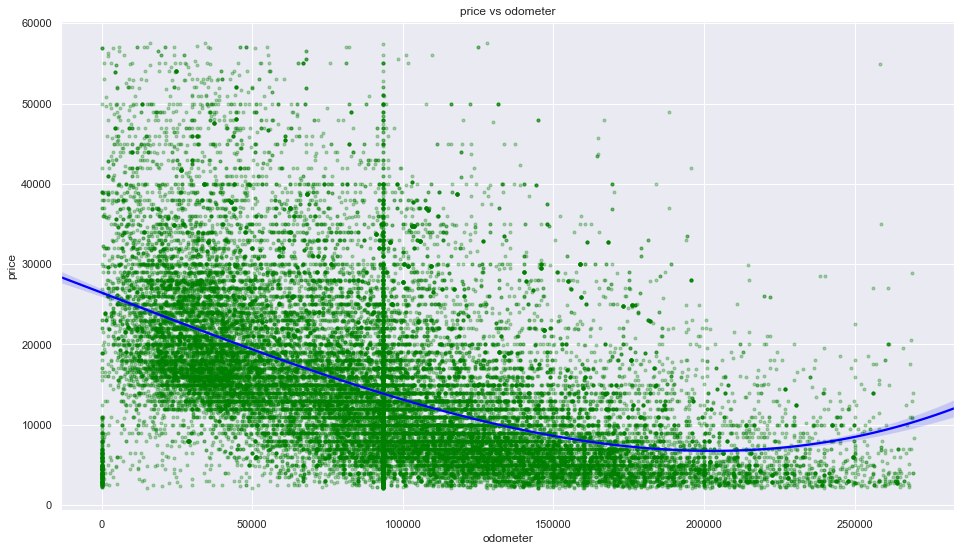

In [81]:
# visualize usage across different features
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
plt.title('price vs year')
sns.regplot(data_more_cleaned.year, data_more_cleaned.price, ax=ax,x_jitter=0.003, 
            line_kws={"color":'red'}, scatter_kws={"alpha":0.2, "s":30},
            order=3)

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
plt.title('price vs odometer')
sns.regplot(data_more_cleaned.odometer, data_more_cleaned.price, ax=ax, marker='.', color="green" ,x_jitter=0.03, 
            line_kws={"color":'blue'}, scatter_kws={"alpha":0.3},
            order=3)

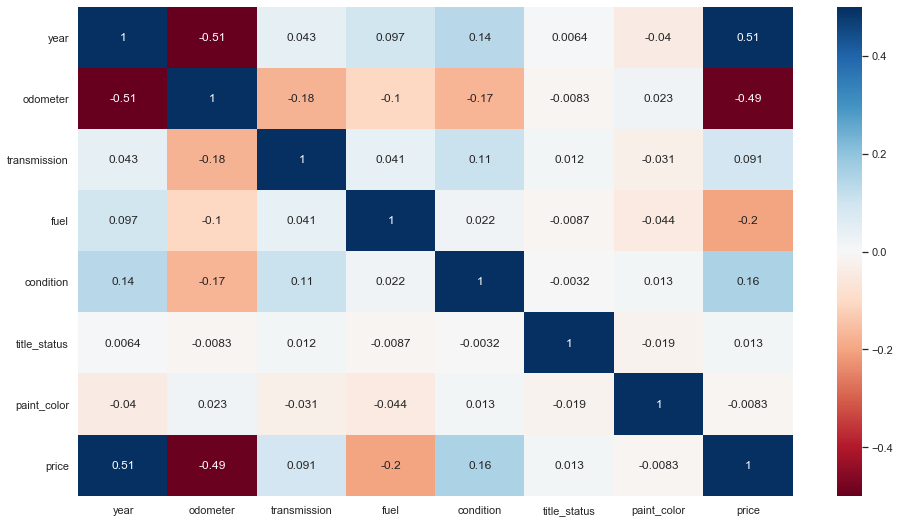

In [82]:
# Lable encoding for few features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = data_more_cleaned
dfle.fuel = le.fit_transform(dfle.fuel)
dfle.transmission = le.fit_transform(dfle.transmission)
dfle.condition = le.fit_transform(dfle.condition)
dfle.title_status = le.fit_transform(dfle.title_status)
dfle.paint_color = le.fit_transform(dfle.paint_color)

numeric_columns = ['year', 'odometer', 'transmission', 'fuel', 'condition','title_status','size','paint_color','price']
corr_mtx_features = dfle[numeric_columns].corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr_mtx_features, annot=True, vmin=-.5, vmax=.5,cmap='RdBu')
plt.show()

### Generate dummies for categorical data

In [83]:
data_with_dummies = pd.get_dummies(data_more_cleaned,drop_first='true')

In [84]:
data_with_dummies.shape

(43635, 64)

In [85]:
y = data_with_dummies['log_price']
X = data_with_dummies.drop(['price', 'log_price'], axis=1)

In [86]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=30

In [87]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

30 selected features


In [88]:
cor_feature

['manufacturer_rover',
 'manufacturer_mazda',
 'manufacturer_ford',
 'manufacturer_nissan',
 'manufacturer_gmc',
 'manufacturer_mercury',
 'manufacturer_mercedes-benz',
 'drive_rwd',
 'manufacturer_toyota',
 'manufacturer_saturn',
 'manufacturer_pontiac',
 'cylinders_8 cylinders',
 'cylinders_5 cylinders',
 'manufacturer_tesla',
 'manufacturer_chrysler',
 'manufacturer_volkswagen',
 'manufacturer_honda',
 'transmission',
 'cylinders_6 cylinders',
 'drive_fwd',
 'fuel',
 'condition',
 'type_mid-size',
 'size_mid-size',
 'manufacturer_ram',
 'cylinders_4 cylinders',
 'size_full-size',
 'type_full-size',
 'odometer',
 'year']

In [89]:
data_preprocessed = data_with_dummies[cor_feature]
data_preprocessed.shape

(43635, 30)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_preprocessed[['odometer','year','drive_rwd']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [92]:
vif

,VIF,Features
0,4.274847,odometer
1,4.506262,year
2,1.230600,drive_rwd


## Scale the data

In [93]:
# Import the scaling module
from sklearn.preprocessing import MinMaxScaler

# The target(s) (dependent variable) is 'log price'
targets = y

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed

# Create a scaler object
scaler = MinMaxScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [94]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [97]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

## Modeling and Evaluation

In [128]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error


def get_metrics(reg, X_train, y_train, X_test, y_test):
    reg.fit(X_train, y_train)
    yhat_train = reg.predict(X_train)
    yhat_test = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)
    return [r2_score(y_train, yhat_train), r2_score(y_test, yhat_test), rmse, train_score,test_score]


names = [ 
         "LinearRegression",
         "LinearSVR",
         "RandomForestRegressor",
         "AdaBoostRegressor",
         "GradientBoostingRegressor"
        ]
regressors = [ 
               LinearRegression(),
               svm.LinearSVR(C=0.01, verbose=False), 
               RandomForestRegressor(verbose=False, max_depth=10, random_state=0),
               AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=50),
               GradientBoostingRegressor(n_estimators=100)
              ]

results = {}

# Iterate through the different regressors
for name, regr in zip(names, regressors):
  print()
  print('Trying : ', name)
  results[name] = get_metrics(regr, X_train, y_train, X_test, y_test)
  print('Train R2: %.3f' % results[name][0], ', Test R2: %.3f' % results[name][1])
  
df_results = pd.DataFrame.from_dict(results, orient='index',
            columns=['Training R2', 'Test R2', 'RMSE','Train Score','Test Score'])
pd.options.display.float_format = '{:.3f}'.format
display(df_results)


Trying :  LinearRegression
Train R2: 0.592 , Test R2: 0.606

Trying :  LinearSVR


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train R2: -2.332 , Test R2: -2.391

Trying :  RandomForestRegressor
Train R2: 0.754 , Test R2: 0.721

Trying :  AdaBoostRegressor
Train R2: 0.750 , Test R2: 0.711

Trying :  GradientBoostingRegressor
Train R2: 0.717 , Test R2: 0.713


,Training R2,Test R2,RMSE,Train Score,Test Score
LinearRegression,0.592,0.606,0.444,0.592,0.606
LinearSVR,-2.332,-2.391,1.302,-2.332,-2.391
RandomForestRegressor,0.754,0.721,0.374,0.754,0.721
AdaBoostRegressor,0.750,0.711,0.380,0.750,0.711
GradientBoostingRegressor,0.717,0.713,0.379,0.717,0.713
